<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Featurization_and_Model_Tuning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Featurization and Model Tuning Project
### Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).
### Domain:
Cement manufacturing
### Context:
Concrete is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.
### Attribute Information:
- Cement : measured in kg in a m3 mixture
- Blast : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

### Learning Outcomes:
- Exploratory Data Analysis
- Building ML models for regression
- Hyper parameter tuning

### Objective:
Modeling of strength of high performance concrete using Machine Learning

### Import Libraries amd Load Data from csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import copy
from scipy.stats import zscore
from sklearn.cluster import KMeans
#from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from matplotlib import pyplot

In [ ]:
cdfile = pd.read_csv('concrete.csv')
cdfile.head()   # Check first 5 records

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
cdfile.tail()   # Check last 5 records

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


#### Observation

- It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
- All the records are numeric.

## 1. Deliverable - 1 :  Exploratory Data Analysis

###  1. a. Univariate Analysis

In [ ]:
# getting total number of rows and column in the dataframe
print(f' Shape of the dataframe = {cdfile.shape}')
print(f' Total number of rows in the dataset =  {cdfile.shape[0]}')
print(f' Total number of columns in the dataset =  {cdfile.shape[1]}')
print(f' The missing value of NaNs are : {cdfile.isna().sum().sum() }')  #checking missing value NaN
print(f' The Number of duplicate records are : {cdfile.duplicated().sum()}')  # Checcking if there is any duplicate record

 Shape of the dataframe = (1030, 9)
 Total number of rows in the dataset =  1030
 Total number of columns in the dataset =  9
 The missing value of NaNs are : 0
 The Number of duplicate records are : 25


In [ ]:
# Checking data type of each colunm to check if any type needs to be changed
cdfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type.
- Memory usage is 72.5 KB.
- Also,there are no null values in the data.All the data type are numerical, we conclude there is no other unwanted data however there are duplicate records which we will deal it later.

In [ ]:
cdfile.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Observations:

**cement:** the range of this attribute is 102 (min) to 540 (max). The mean (281.16) and median (272.90) values differ slightly. The standard deviation value is quite high (104.50). For 75% of the given observations, this value is less than 350 (3rd quartile).

**slag:** the range of this attribute is 0 (min) to 359.40 (max). The mean (73.89) and median (22) values differ significantly indicating skewness of the distribution. The standard deviation value is 86.27. For 25% of the given observations, this value is 0..! (1st quartile).

**ash:** the range of this attribute is 0 (min) to 200 (max). Difference between the mean (54.18) and median (0) values is very high. The standard deviation value (64) is also high. For 50% of the given observations, this value is 0..! (2nd quartile). This attribute seems to have highly skewed distribution.

**water:** the range of this attribute is 121.8 (min) to 247 (max). The mean (181.56) and median (185) values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192 (3rd quartile). This attribute seems to have normal distribution.

**superplastic:** the range of this attribute is 0 (min) to 32.20 (max). Difference between the mean (620) and median (6.40) values is negligible. The standard deviation value is almost 6. For 25% of the given observations, this value is 0..! (1st quartile).

**coarseagg**: the range of this attribute is 801 (min) to 1145 (max). The mean (aprox. 973) and median (968) values differ slightly. The standard deviation value is 77.75. For 75% of the given observations, this value is 1029 (3rd quartile).

**fineagg:** the range of this attribute is 594 (min) to 992 (max). The mean (aprox. 773) and median (779) values differ slightly. The standard deviation value is 80.17. For 25% of the given observations, this value is 731 (1st quartile).

**age:** the range of this attribute is 1 (min) to 365 (max) days. The mean (approx. 46) and median (28) values differ significantly. The standard deviation value is approx 63 which is quite high. For 75% of the given observations, this value is 56 days (3rd quartile). This attribute seems to have skewed distribution.

- It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
- We can see that slag,ash,superplastic and age are right skewed

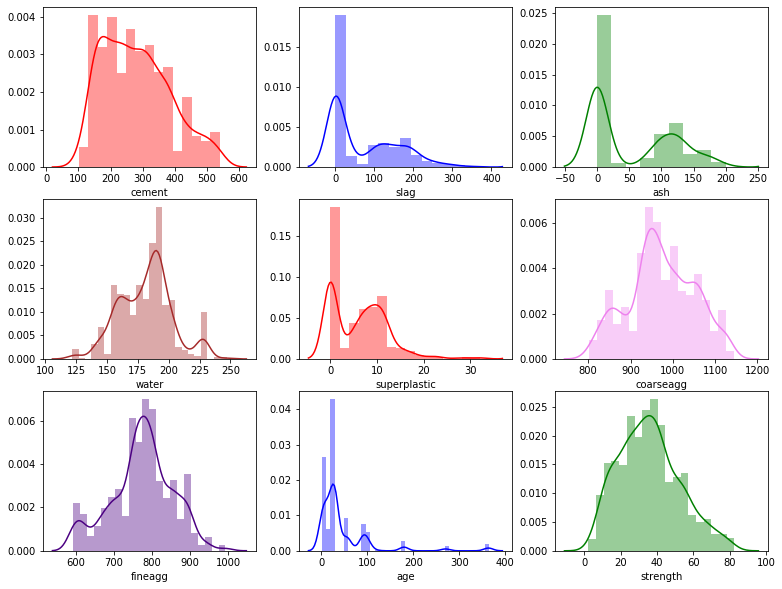

In [ ]:
cols = cdfile.columns
colors = ['red', 'blue', 'green','brown','red', 'violet', 'indigo','blue','green']
plt.figure(figsize=(13,10))
pos = 1
for feature,colors in zip(cols,colors):
    plt.subplot(3,3,pos)
    sns.distplot(cdfile[feature],color=colors,kde=True)
    pos+=1


#### Observation

We can see observe that :

- cement is almost normal.
- slag has three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

In [ ]:
pd_sk = pd.DataFrame(cdfile.skew().sort_values(ascending=False),columns=['skewness'])
#abs(pd_sk[pd_sk['skewness']>1]).T # lets filter only high skew greater than 1
pd_sk.T

,age,superplastic,slag,ash,cement,strength,water,coarseagg,fineagg
skewness,3.269177,0.907203,0.800717,0.537354,0.509481,0.416977,0.074628,-0.04022,-0.25301


#### Observations:

- Distribition of most of the columns show positive skewness (long right tail)
- The skewness values show agreement with our qualitative analysis of the distribution plot shown above
- Water and coarseag have approximately symmetric distributions
- Attributes coarseagg and fineagg show negative skewness

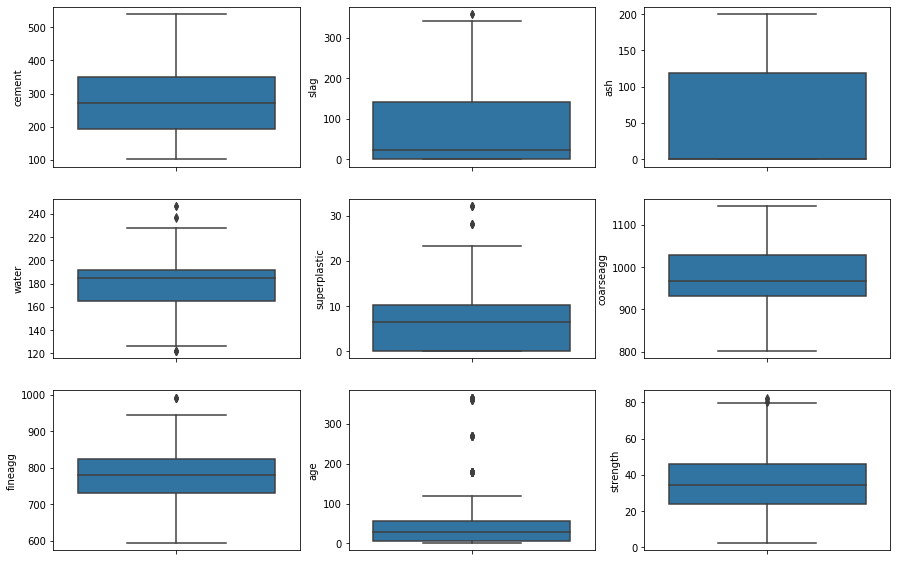

In [ ]:
#check Outliers
plt.figure(figsize= (15,10))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in cdfile.columns:   # for-loop to iterate over every attribute to be visualized
    plt.subplot(3, 3, pos)   # plot grid
    sns.boxplot(y=cdfile[feature],orient='vertical')
    pos += 1

#### Observations:

- One can see that, box-plots of independent attributes namely slag, water, superplastic, fineagg and age show outliers
- Target attribute i.e., strength also has outliers
- water attribute shows presence of outliers on both sides of the whiskers
- Box plot of age attribute shows high amount of outliers

### 1. b. Multivariate Analysis

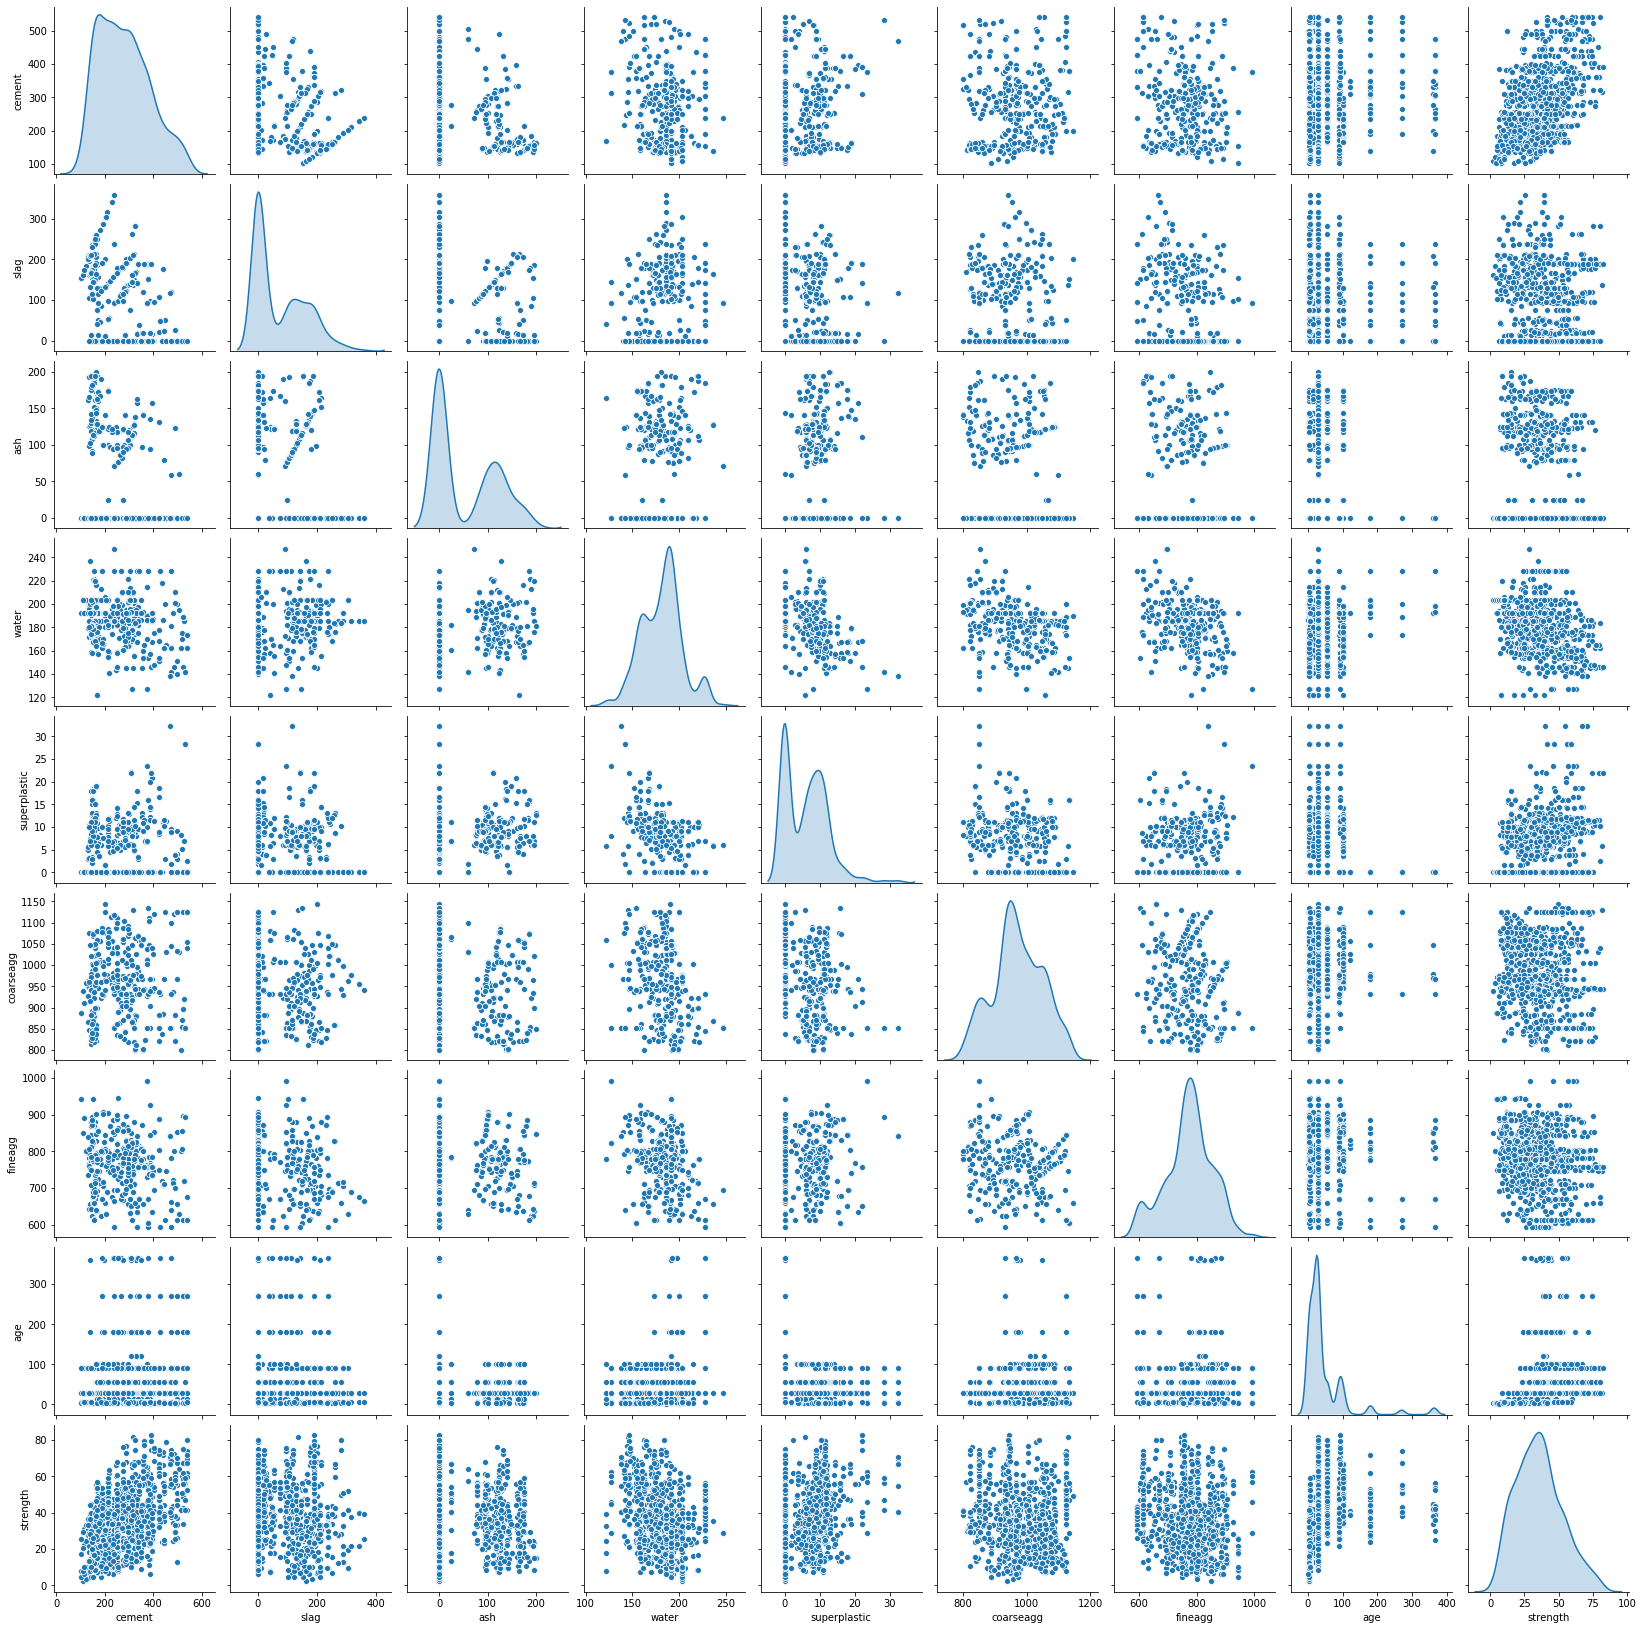

In [ ]:
#Let's pairplot to see the features relationship
sns.pairplot(cdfile,diag_kind='kde')

#### Diagonals Analysis The diagonal gives the same information, we got using distplot .

#### Off Diagonal Analysis: Relationship between indpendent attributes

__Scatter plots__

1. **cement vs other independent attributes:** This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.
2. **slag vs other independent attributes:** This attribute also does not have any significant relation with other variables.
3. **ash vs other independent attributes:** This attribute also does not have any significant relation with other variables.
4. **water vs other independent attributes:** This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
5. **superplastic vs other independent attributes:** This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
6. **coarseagg vs other independent attributes:** This attribute also does not have any significant relation with any other attributes.
7. **fineagg vs other independent attributes:** It has negative linear relationship with water. It does not have any significant relation with any other attributes.

__The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.__

**Relationship between dependent and independent attributes**

**strength:** Now its comparing the target column with all other independent attributes and its showing us very vital information.

- **strength vs cement:** It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- **strength vs slag:** There is also no particular trend.
- **strength vs age:** For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- **strength vs superplastic:** For a given value of superplastic, we have different values of strength. Hence, It is not a good predictor.
- **Other attributes:** does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

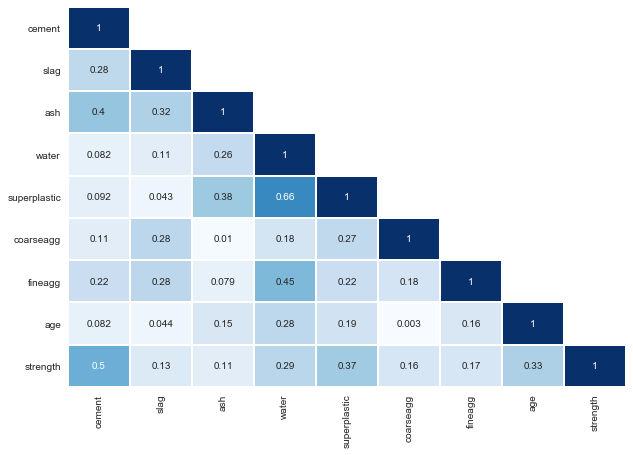

In [ ]:
# Correlation among the attributes
corr = abs(cdfile.corr())
lower_triangle = np.tril(corr, k = 0)
mask = lower_triangle == 0
plt.figure(figsize = (10,7))
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0);

- There is no strong correlation between the variables

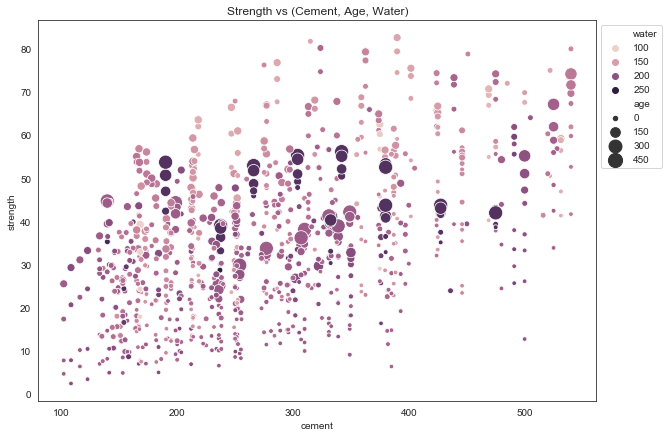

In [ ]:
# Lets analyst Strength vs (Cement, Age, Water), the most used ingredients
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y='strength', x='cement',hue='water', size='age', data=cdfile, ax=ax, sizes=(20, 200))
ax.set_title('Strength vs (Cement, Age, Water)')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

#### Conclusions from Strength vs (Cement, Age, Water)
- Compressive strength increases with amount of cement
- Compressive strength increases with age
- Cement with low age requires more cement for higher strength
- The older the cement is the more water it requires
- Concrete strength increases when less water is used in preparing it

### 1. c. Addresss Missing Values and Outliers

In [ ]:
# There is no missing values but we have 25 deplicate records as seen in Univariate Analysis;
# it may be due to wrong entry so i am removing it.
# pdfile[pdfile.duplicated()]
rcdfile = copy.deepcopy(cdfile) # copy to different dataframe
rcdfile.drop_duplicates(inplace=True)
rcdfile.reset_index(drop=True, inplace=True)
rcdfile

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1000,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1001,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1002,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1003,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


- **After removing the deplicate records, the number of rows reduced from 1030 to 1005. 25 duplicate records removed**

In [ ]:
# Outliers information
q1=rcdfile.quantile(0.25)
q3=rcdfile.quantile(0.75)
IQR=q3-q1
cwo=((rcdfile.iloc[:] <(q1-1.5*IQR))|(rcdfile.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=rcdfile.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(rcdfile),2)
opdf

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.20
ash,0,0.00
water,15,1.49
superplastic,10,1.00
coarseagg,0,0.00
fineagg,5,0.50
age,59,5.87
strength,8,0.80


__Strategy to remove outliers:__ We choose to replace attribute outlier values by their respective median

In [ ]:
#find the outliers and replace them by median
for col_name in rcdfile.columns[:-1]:
    q1 = rcdfile[col_name].quantile(0.25)
    q3 = rcdfile[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    rcdfile.loc[(rcdfile[col_name] < low) | (rcdfile[col_name] > high), col_name] = rcdfile[col_name].median()

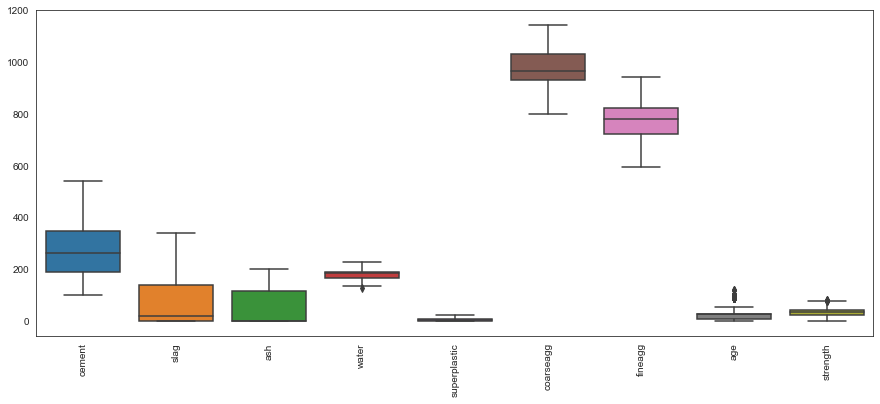

In [ ]:
# Let us check presence of outliers
plt.figure(figsize=(15,6))
box = sns.boxplot(data=rcdfile)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

#### Observations after outlier removal:

- Outliers are completely removed from slag,superplastic,fineagg attributes
- water and age attribute still shows some outliers and this is due the new median.However, we are not going to treat them again.
- Outliers in the strength column are not removed completely.

## 2. Deliverable - 2 (Feature Engineering techniques)

### 2. a. Identify opportunities (if any) to create a composite feature, drop a feature etc

- In this problem, we do have an opportunity to add a composite feature which is highly useful to predict the concrete strength in MPa (Mega Pascal) namely water-cement ratio.
- (Ref: https://en.wikipedia.org/wiki/Water%E2%80%93cement_ratio )
- There is a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength where as higher values of ratio provide small concrete strength.

In [ ]:
# Let's add this new composite feature before target attribute.
new_cdfile = copy.deepcopy(rcdfile) #Copy the dataframe for further use
new_cdfile.insert(8,'water/cement',new_cdfile['water']/new_cdfile['cement'])
# Let's check whether the feature is added properly or not?
new_cdfile.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,18.29


In [ ]:
new_cdfile.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.303669,-0.385610,-0.053217,-0.026511,-0.086205,-0.262508,-0.038201,-0.882022,0.488283
slag,-0.303669,1.000000,-0.308903,0.132249,0.034945,-0.277239,-0.291118,-0.035485,0.392357,0.105877
ash,-0.385610,-0.308903,1.000000,-0.296261,0.492786,-0.026468,0.103619,0.063818,0.235761,-0.080648
water,-0.053217,0.132249,-0.296261,1.000000,-0.610666,-0.213945,-0.425633,-0.034910,0.291950,-0.278499
superplastic,-0.026511,0.034945,0.492786,-0.610666,1.000000,-0.195028,0.136685,0.057438,-0.141730,0.318721
coarseagg,-0.086205,-0.277239,-0.026468,-0.213945,-0.195028,1.000000,-0.144140,0.022952,-0.051324,-0.144717
fineagg,-0.262508,-0.291118,0.103619,-0.425633,0.136685,-0.144140,1.000000,0.051224,0.109552,-0.202883
age,-0.038201,-0.035485,0.063818,-0.034910,0.057438,0.022952,0.051224,1.000000,0.005438,0.498530
water/cement,-0.882022,0.392357,0.235761,0.291950,-0.141730,-0.051324,0.109552,0.005438,1.000000,-0.493280
strength,0.488283,0.105877,-0.080648,-0.278499,0.318721,-0.144717,-0.202883,0.498530,-0.493280,1.000000


- One can see that, the newly added feature is moderately correlated (negatively) with target attribute

**Dropping a feature:** We won't drop any feature for the time being, however after feature engineering stage, we may choose to drop some features to avoid overfitting

### 2. b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

- As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients. Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

- In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features with degree 3.

In [ ]:
poly3 = preprocessing.PolynomialFeatures(degree = 3, interaction_only=True)
poly3_ft = poly3.fit_transform(new_cdfile.drop('strength',axis=1))
df_poly3= pd.DataFrame(poly3_ft,columns=['feat_'+str(x) for x in range(poly3_ft.shape[1])])
df_poly3.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [ ]:
# Let us create the dataframe with all features
df_feat = new_cdfile.drop('strength',axis=1).join(df_poly3)
df_feat['strength'] = new_cdfile['strength']
print(df_feat.shape)
df_feat.head()

(1005, 140)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


__The newly created dataframe with features contains 139 independent and 1 target attribute. Since, all the features will not be useful, we apply LASSO regularization step and select the most relevant features. This will also reduce the problem of overfitting models.__

In [ ]:
#from sklearn.linear_model import Lasso
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
lasso = linear_model.Lasso() # Since it uses L1 reglarization features with zero coefficients will be insignificant.
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Let's us get the features selected by Lasso
lasso_feat = X_train.columns[lasso.coef_!=0].tolist() # Dropping the features with 0 coefficient value
print(lasso_feat) # Features selected using LASSO regularization
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(X_train.shape[1],len(lasso_feat)))
df_feat = df_feat[lasso_feat] # Select independent features
df_feat.head()

Lasso model: [ 0.00000000e+00 -4.69072515e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  7.92755781e-02 -2.92231295e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.70932416e-03
 -1.04734743e-03 -0.00000000e+00 -0.00000000e+00 -4.32617077e-04
 -2.87025880e-04 -1.37251170e-04 -4.21918306e-03  1.31149037e-04
 -6.81747170e-05  6.09385128e-04  0.00000000e+00  1.44566644e-03
 -5.45424720e-05  1.27872136e-02 -3.84584790e-06 -1.06564732e-05
  7.37120197e-04  0.00000000e+00  2.59390958e-04 -4.72078689e-03
  2.42153084e-05  9.43344954e-05 -9.66763721e-04 -0.00000000e+00
  4.21491089e-03 -3.66907561e-04  1.93114871e-04 -5.74736128e-04
 -0.00000000e+00 -2.86640092e-04 -2.62822650e-03  0.00000000e+00
  0.00000000e+00  2.93725000e-05  2.26627589e-04 -2.84027987e-02
 -1.55796440e-04  0.00000000e+00  0.00000000e+00  1.93149113e-06
  1.12495799e-06 -4.71799892e-06 -5.14979152e-07  8.00587000e-07
 -5.62841280

,slag,coarseagg,fineagg,feat_6,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,212.0,971.8,748.5,971.8,748.5,29955.60,0.00,28754.55,0.00,137315.34,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,42.2,1080.8,796.2,1080.8,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,0.0,956.9,861.2,956.9,861.2,0.00,23925.00,46850.00,1375.00,239225.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,114.0,932.0,670.0,932.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,183.4,1047.4,696.7,1047.4,696.7,28390.32,0.00,29922.84,1408.68,162137.52,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


**Out of total 139 independent features, number of features selected by LASSO regularization are 117**

### 2. c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [ ]:
df_z = rcdfile.apply(zscore) # Get the normalized dataframe
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

,num_clusters,cluster_errors
0,1,9045.000000
1,2,7363.359373
2,3,6306.575809
3,4,5527.034648
4,5,5052.061319
5,6,4593.814526
6,7,4174.709759
7,8,3898.656174
8,9,3671.504656
9,10,3483.265542


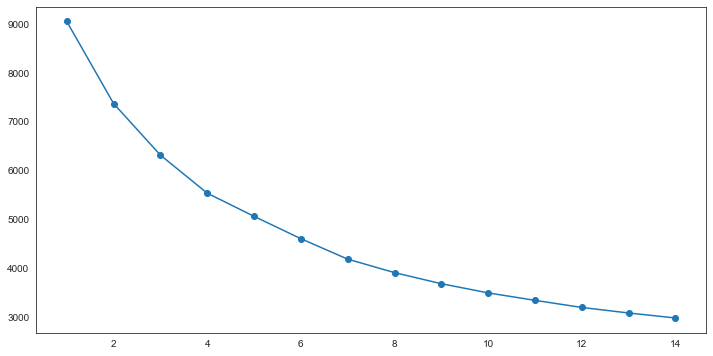

In [ ]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
kmeans = KMeans(n_clusters= 7)
kmeans.fit(df_z)

KMeans(n_clusters=7)

In [ ]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[184 167 164  89 129 104 168]


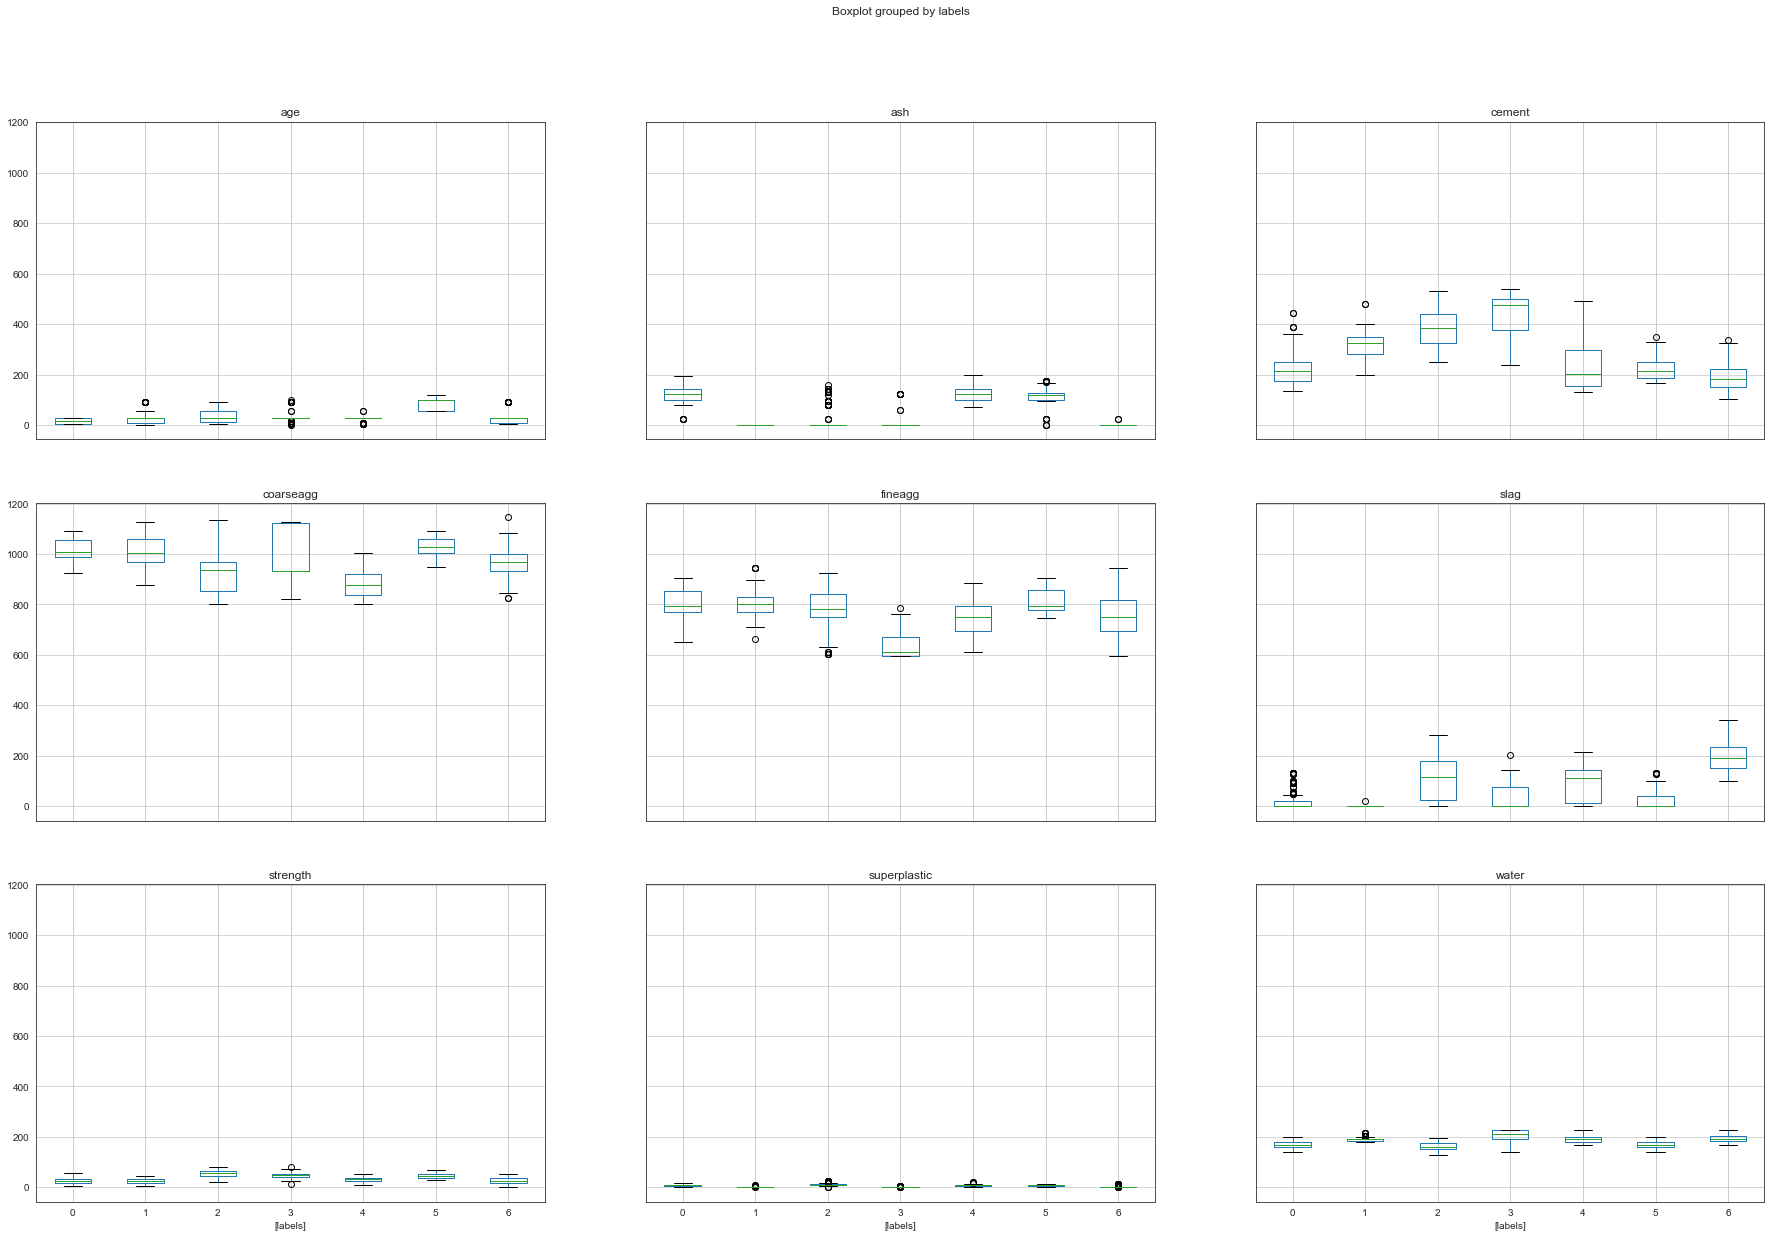

In [ ]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
df_labeled = rcdfile.join(cluster_labels)
df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20));

**No distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. The potential of getting better results by breaking data into clusters is unlikely to give the desired result**

## 3. Deliverable -3 (create the model )

### 3. a. Obtain feature importance for the individual features and present your findings

#### In this section we test and compare predictive performance of various ML Models using the amount of explained variance (in percentage) as an evaluation metric. ML Models used for comparison are:

- Linear Regression
- K-NN Regressor
- SVR
- Decision Tree Regressor
- Adaboost Regressor
- Random Forest Regressor
- Bagging Regressor
- Gradient Boost Regressor

In [ ]:
rcdfile.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
# Let's create train and test sets
X = rcdfile.drop('strength',axis=1)
y = rcdfile['strength']

In [ ]:
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create empty dataframe to store the results
df_result_raw_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
# We will use the pipeline approach
pipelines = []
pipelines.append(('Linear Regression',Pipeline([('scaler',preprocessing.RobustScaler()),('LR',linear_model.LinearRegression())])))
pipelines.append(('KNN Regressor',Pipeline([('scaler',preprocessing.RobustScaler()),('KNNR',neighbors.KNeighborsRegressor())])))
pipelines.append(('SupportVectorRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('SVR',svm.SVR())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('DTR',tree.DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('ABR',ensemble.AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('RBR',ensemble.RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('BGR',ensemble.BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',preprocessing.RobustScaler()),('GBR',ensemble.GradientBoostingRegressor())])))

In [ ]:
# Let's find and store the cross-validation score for each pipeline for training data with raw features.
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = model_selection.KFold(n_splits=10,random_state=2020)
    cv_results = model_selection.cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_raw_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

In [ ]:
# Let's check the training results with raw features
df_result_raw_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,70.203756,5.661786
1,KNN Regressor,80.222924,4.455593
2,SupportVectorRegressor,72.137389,4.270005
3,DecisionTreeRegressor,80.665054,5.429414
4,AdaboostRegressor,77.220382,3.517523
5,RandomForestRegressor,89.096303,3.309755
6,BaggingRegressor,88.512832,3.328515
7,GradientBoostRegressor,89.014327,2.722975


In [ ]:
# Let's find and store the cross-validation score for each pipeline for test data with raw features.
df_result_raw_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_raw_test.loc[ind] = [name,metrics.explained_variance_score(y_test,y_pred)*100]

In [ ]:
# Let's check the test results with raw features
df_result_raw_test

,Regressor,ExplVarianceScore
0,Linear Regression,68.941524
1,KNN Regressor,85.709948
2,SupportVectorRegressor,76.486413
3,DecisionTreeRegressor,84.768328
4,AdaboostRegressor,79.660738
5,RandomForestRegressor,90.972016
6,BaggingRegressor,90.042428
7,GradientBoostRegressor,88.917861


From the above result dataframes, it is clear that ensemble models are better choice for this problem. Without any feature engneering, we get best score using Gradient Boosting Regressor both in terms of explained variance in percentage and standard deviation. As per the expectations, linear regression performs poorly

### Accuracy of models using modified dataframe

In [ ]:
df_feat.head()

,slag,coarseagg,fineagg,feat_6,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,212.0,971.8,748.5,971.8,748.5,29955.60,0.00,28754.55,0.00,137315.34,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,42.2,1080.8,796.2,1080.8,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,0.0,956.9,861.2,956.9,861.2,0.00,23925.00,46850.00,1375.00,239225.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,114.0,932.0,670.0,932.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,183.4,1047.4,696.7,1047.4,696.7,28390.32,0.00,29922.84,1408.68,162137.52,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [ ]:
# Let's create train and test sets from modified dataframe with raw as well as new features.
X = df_feat
y = rcdfile['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# Let's create dataframe to store the results.
df_result_mod_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = model_selection.KFold(n_splits=10,random_state=2020)
    cv_results = model_selection.cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_mod_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]
# Let's check the training results with raw features  as well as new features
df_result_mod_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,73.185536,6.761600
1,KNN Regressor,72.099087,6.665851
2,SupportVectorRegressor,1.761510,1.852580
3,DecisionTreeRegressor,80.615153,5.041308
4,AdaboostRegressor,83.004054,3.070995
5,RandomForestRegressor,88.952810,3.698787
6,BaggingRegressor,87.372123,3.827125
7,GradientBoostRegressor,89.923357,2.747783


In [ ]:
# Let's find and store the cross-validation score for each pipeline for training data with raw as well as new features.
df_result_mod_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_mod_test.loc[ind] = [name,metrics.explained_variance_score(y_test,y_pred)*100]
# Let's check the test results with raw features  as well as new features
df_result_mod_test

,Regressor,ExplVarianceScore
0,Linear Regression,71.143492
1,KNN Regressor,76.800501
2,SupportVectorRegressor,-0.921357
3,DecisionTreeRegressor,78.925891
4,AdaboostRegressor,85.703727
5,RandomForestRegressor,91.609581
6,BaggingRegressor,90.635467
7,GradientBoostRegressor,90.359055


__One can see that, using the feature engineered dataframe, we do not get any significant improvement in the performance of ML models than that of obtained with raw features. In fact Support Vector Regressor has reduced drastically from 76 to 2. We use dataframe with raw features in our final stage i.e., model tuning since ensemble models which are better choice for this problem, do not show any significant improvement for selected features (118) over performance with raw features (8).__

**Feature importance given by the ensemble models**
For this problem, the ensemble models work well. In this section we analyse the feature importance given by these models.

In [ ]:
# Separate target and independent features
X = rcdfile.drop('strength',axis=1)
y = rcdfile['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# Creating pipelines for 3 best models.
pipe_rf = Pipeline([('scaler',preprocessing.RobustScaler()),('RBR',ensemble.RandomForestRegressor())])
pipe_br = Pipeline([('scaler',preprocessing.RobustScaler()),('BGR',ensemble.BaggingRegressor())])
pipe_gbr = Pipeline([('scaler',preprocessing.RobustScaler()),('GBR',ensemble.GradientBoostingRegressor())])
# Initalize the empty dataframes to capture the feature importances given by these models..
df_featImp_rf = df_featImp_br = df_featImp_gbr = pd.DataFrame({'Features':[], 'Importance':[]})

In [ ]:
# feature importance given by random forest regressor
pipe_rf.fit(X_train,y_train)
featImp_rf = pipe_rf.steps[1][1].feature_importances_
df_featImp_rf['Features'] = X_train.columns
df_featImp_rf['Importance'] = featImp_rf
# Feature importance given by Random Forest Regressor
df_featImp_rf.sort_values(by='Importance', ascending=False)

,Features,Importance
0,cement,0.323561
7,age,0.316302
3,water,0.129738
1,slag,0.087613
4,superplastic,0.056096
6,fineagg,0.038852
5,coarseagg,0.031917
2,ash,0.015922


**Find feature importances using Bagging Regressor**

In [ ]:
# feature importance given by Gradient Boost Regressor
pipe_gbr.fit(X_train,y_train)
featImp_gbr = pipe_gbr.steps[1][1].feature_importances_
df_featImp_gbr['Features'] = X_train.columns
df_featImp_gbr['Importance'] = featImp_gbr
# Feature importance given by Random Forest Regressor
df_featImp_gbr.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.355515
0,cement,0.320880
3,water,0.116683
1,slag,0.098108
4,superplastic,0.052103
6,fineagg,0.030681
5,coarseagg,0.016505
2,ash,0.009525


**Feature importances given by random forest regressor and gradient boost regressor have same features of importance thought there are some value differences. One can see that,**

- age and cement attributes are the most important features to predict the concrete strength
- ash attribute the weakest predictor of concrete strength

## 4. Deliverable - 4 (Tuning the model)

### 4. a. Algorithms that you think will be suitable for this project

Since, the target variable in this problem i.e., strength is a highly non-linear function of independent variables, any algorithm which captures this non-linear relationship is suitable for this project. Basic models applicable for this problem can be linear regression with polynomial features of degree d with d>1, models with nonlinear kernels such as support vector regressor with nonlinear kernels such as RBF. Decision tree regression model is also suitable since it can also capture nonlinearity however more generalized model such as random forest regression would be more effective. Finally, ensemble regression models which consist of multiple models which either work parallely or sequentially to give final output such as adaboost, bagging and gradient boost regressor should be most effective

**From results presented above, we can conclude that ensemble based regression models namely gradient boost regressor, bagging regressor and random forest regressor are most effective for this problem and we will tune the gradient boosting model (best performing) to squeeze the extra performance out of it.**

### 4. b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

We will make use of GridSearchCV and RandomSearchCV functions to find the best model parameters by tuning the hyper parameters

In [ ]:
X = rcdfile.drop('strength',axis=1)
y = rcdfile['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
pipe_gbr = Pipeline([('scaler',preprocessing.RobustScaler()),('GBR',ensemble.GradientBoostingRegressor())])

In [ ]:
# Let's see what are the hyper parameters for gradient boosting regressor model
pipe_gbr.steps[1][1]

GradientBoostingRegressor()

In [ ]:
param_grid=[{'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6],
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }]

In [ ]:
search = model_selection.GridSearchCV(pipe_gbr, param_grid, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.929):
{'GBR__learning_rate': 0.1, 'GBR__max_depth': 6, 'GBR__max_features': 0.1, 'GBR__min_samples_leaf': 17, 'GBR__n_estimators': 1000}


In [ ]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
gy_pred_train = y_pred_train
gy_pred_test = y_pred_test
print('Testing Explained Variance Score is  {}'.format(metrics.explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(metrics.r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.9263264927346184
Testing R2 Score is  0.9257351428080051


#### Using RandomizedSearchCV

In [ ]:
random_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6],
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }
search = model_selection.RandomizedSearchCV(estimator=pipe_gbr, param_distributions=random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.922):
{'GBR__n_estimators': 1000, 'GBR__min_samples_leaf': 9, 'GBR__max_features': 0.1, 'GBR__max_depth': 6, 'GBR__learning_rate': 0.02}


In [ ]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
print('Testing Explained Variance Score is  {}'.format(metrics.explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(metrics.r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.9163483756688174
Testing R2 Score is  0.916103195515616


#### Using GridSearchCV based model tuning the training and test scores (explained variance) are about 92.5%

### 4. c. Model performance range at 95% confidence level

#### To find out the Model Performance Range, let's try Bootstrap Sampling for Gradient Boosting Regressor

In [ ]:
concrete_XY = X.join(y)

In [ ]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000
# size of a bootstrap sample
n_size = int(len(df_z) * .75)    # picking only 75 % of the given data in every bootstrap sample

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
     # fit model
    gbmTree = ensemble.GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1])
    # Take the target column for all rows in test set

    y_test = test[:,-1]
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])
    stats.append(score)

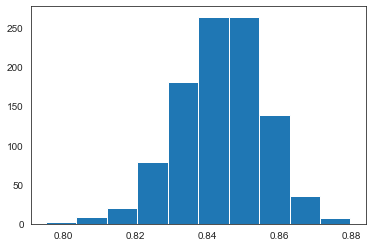

95.0 confidence interval 81.9% and 86.5%


In [ ]:
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Finally, Our Model performance range will be between 81.8% to 86.5% at 95% confidence level